# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sinasc = pd.read_csv('sinasc_RO_2019.csv')

In [3]:
#para facilitar a visualização, abaixo serão selecionadas apenas as variáveis que serão utilizadas nesta análise
sinasc = sinasc[['APGAR5', 'GESTACAO','SEXO','PESO']]

In [4]:
sinasc.shape

(27028, 4)

In [5]:
sinasc.isna().sum()

APGAR5       103
GESTACAO    1232
SEXO           4
PESO           0
dtype: int64

In [6]:
#os dados faltantes das variáveis APGAR5  e SEXO serão excluídos
sinasc = sinasc[~sinasc['APGAR5'].isna()]
sinasc = sinasc[~sinasc['SEXO'].isna()]

In [7]:
#frequência de APGAR5 nos dados onde a variável GESTACAO está faltando
(sinasc[sinasc['GESTACAO'].isna()]['APGAR5'].value_counts()/sinasc[sinasc['GESTACAO'].isna()]['APGAR5'].value_counts().sum())*100

9.0     57.894737
10.0    32.812500
8.0      7.072368
6.0      0.575658
7.0      0.575658
5.0      0.411184
2.0      0.164474
1.0      0.164474
4.0      0.164474
0.0      0.082237
3.0      0.082237
Name: APGAR5, dtype: float64

In [8]:
#frequência de APGAR5 em todo o dataframe
sinasc['APGAR5'].value_counts()*100/sinasc['APGAR5'].value_counts().sum()

9.0     59.711749
10.0    31.172690
8.0      7.406857
7.0      0.895212
6.0      0.289737
5.0      0.167156
1.0      0.089150
4.0      0.085435
0.0      0.063148
2.0      0.063148
3.0      0.055719
Name: APGAR5, dtype: float64

In [9]:
#como a frequência APGAR5 nas análises acima é próxima, os dados faltantes de GESTACAO podem ser excluídas sem uma grande perda de informação
sinasc = sinasc[~sinasc['GESTACAO'].isna()]

In [10]:
sinasc.isna().sum()

APGAR5      0
GESTACAO    0
SEXO        0
PESO        0
dtype: int64

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [11]:
sinasc.loc[sinasc['APGAR5'] >= 8, 'apgar_cat'] = 'normal'
sinasc.loc[(sinasc['APGAR5'] == 7) | (sinasc['APGAR5'] == 6), 'apgar_cat'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] == 5) | (sinasc['APGAR5'] == 4), 'apgar_cat'] = 'asfixia moderada'
sinasc.loc[sinasc['APGAR5'] <= 3, 'apgar_cat'] = 'asfixia grave'

In [12]:
sinasc.head()

,APGAR5,GESTACAO,SEXO,PESO,apgar_cat
0,10.0,37 a 41 semanas,Masculino,3685,normal
1,9.0,37 a 41 semanas,Feminino,3055,normal
2,10.0,37 a 41 semanas,Feminino,3460,normal
3,10.0,37 a 41 semanas,Feminino,2982,normal
4,10.0,37 a 41 semanas,Feminino,3310,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [13]:
sinasc['GESTACAO'].value_counts()

37 a 41 semanas        22520
32 a 36 semanas         2233
42 semanas e mais        698
28 a 31 semanas          162
22 a 27 semanas           85
Menos de 22 semanas        7
Name: GESTACAO, dtype: int64

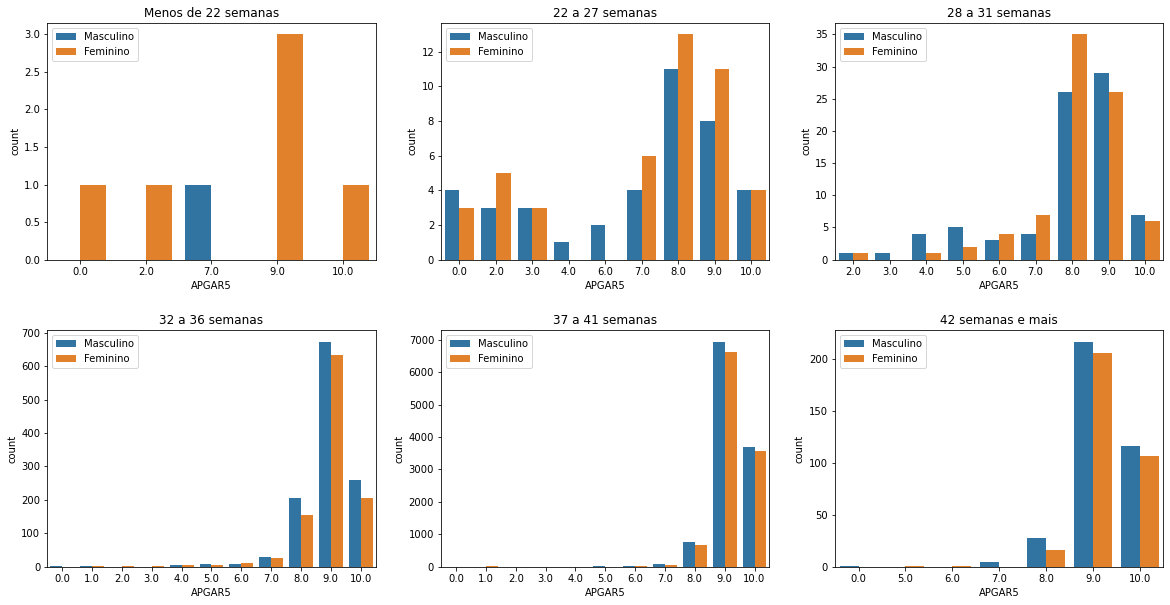

In [14]:
tempo_gestacao = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']

plt.close('all')
fig, axes = plt.subplots(2, 3, figsize = (20,10))

tempo = 0
for i in range(2):
    for j in range(3):            
        f = sns.countplot(ax = axes[i,j], x='APGAR5', hue='SEXO', data=sinasc[sinasc['GESTACAO'] == tempo_gestacao[tempo]])
        f.set(title=tempo_gestacao[tempo])
        f.legend(labels= ['Masculino', 'Feminino'], loc='upper left')     
        tempo +=1      
plt.subplots_adjust(hspace=0.3)      

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [15]:
freq = pd.crosstab(sinasc['GESTACAO'], sinasc['apgar_cat'])
freq = freq[['asfixia grave','asfixia moderada','asfixia leve', 'normal']]
freq

apgar_cat,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,21,1,12,51
28 a 31 semanas,3,12,18,129
32 a 36 semanas,7,19,73,2134
37 a 41 semanas,33,28,195,22264
42 semanas e mais,1,1,6,690
Menos de 22 semanas,2,0,1,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [16]:
percent_linha = freq.div(freq.sum(1),0)
percent_linha

apgar_cat,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.011765,0.141176,0.600000
28 a 31 semanas,0.018519,0.074074,0.111111,0.796296
32 a 36 semanas,0.003135,0.008509,0.032691,0.955665
37 a 41 semanas,0.001465,0.001243,0.008659,0.988632
42 semanas e mais,0.001433,0.001433,0.008596,0.988539
Menos de 22 semanas,0.285714,0.000000,0.142857,0.571429


In [17]:
percent_linha.sum(1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

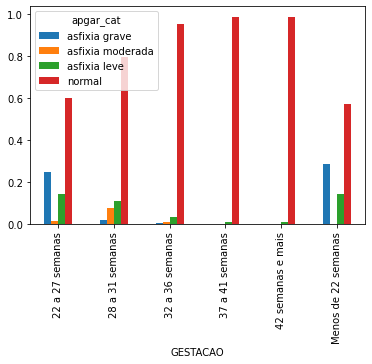

In [18]:
percent_linha.plot.bar()

O gráfico de barras mostra que quanto menor o período de gestação, maior a chance do bebê apresentar algum tipo de asfixia ao nascer. 

Em bebês cujo tempo de gestação foi inferior a 27 semanas, a probabilidade é próxima a 40%, sendo alto o risco de asfixia grave. Já em bebês cujo período de gestação foi de 28 a 31 semanas, a probabilidade de apresentar asfixia ao nascer é aproximadamente 20%, embora seja provável desta acontecer nas formas menos graves.

A partir de 32 semanas de gestação, o risco de asfixia nos primeiros 5 minutos de vida do bebê é baixo, no entanto, quando comparado o período de '32 a 36 semanas' com os períodos de '37 a 41 semanas' e '42 semanas e mais', é possível notar que no primeiro há um risco um pouco maior que os outros (cerca de 3%).

Desta forma, analisando as classificações de Apgar no quinto minuto de vida, e considerando um viés pessimista, o gráfico corrobora a decisão médica de classificar o parto como prematuro quando a gestação foi inferior a 37 semanas.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<AxesSubplot:xlabel='apgar_cat', ylabel='PESO'>

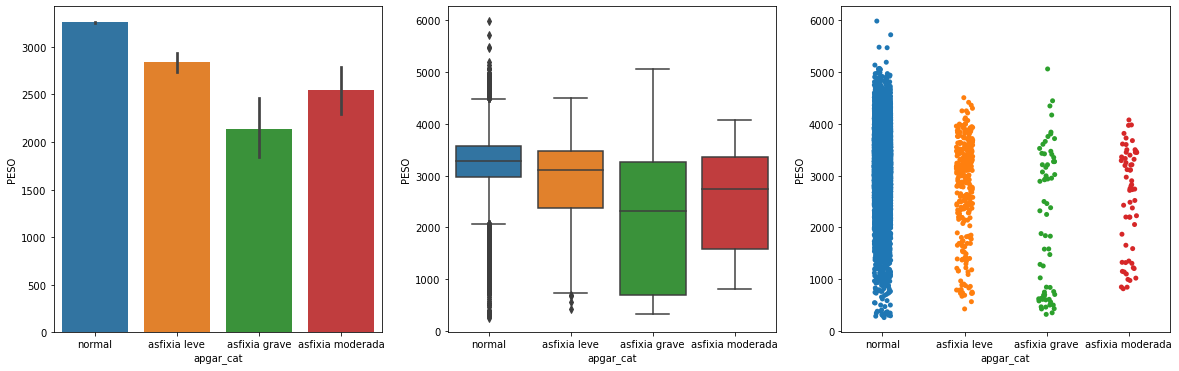

In [37]:
plt.close('all')
fig, axes = plt.subplots(1, 3, figsize = (20,6))

sns.barplot(ax = axes[0], data=sinasc, x = 'apgar_cat', y = 'PESO')
sns.boxplot(ax = axes[1], data=sinasc, x = 'apgar_cat', y = 'PESO')
sns.stripplot(ax = axes[2], data=sinasc, x = 'apgar_cat', y = 'PESO')

Comparando as medianas, bem como as caixas que correspondem a 50% dos dados no boxplot, e comparando o peso médio dos bebês por categoria de apgar 5 através da análise do gráfico de barras, observa-se que um apgar 5 mais baixo pode estar relacionado a pesos menores.